In [1]:
import pandas as pd

In [3]:
Employment = pd.read_csv('C:\\Users\\om sai\\Downloads\\Case 2\\LR Practice data.csv')

In [4]:
Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
GNP.deflator    2938 non-null float64
GNP             2938 non-null float64
Unemployed      2938 non-null float64
Armed.Forces    2938 non-null float64
Population      2938 non-null float64
Employed        2938 non-null float64
dtypes: float64(6)
memory usage: 137.8 KB


In [5]:
Employment.describe()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,3383.989632,30744.994551,19482.279926,9171.264779,2239.144062,1112.140688
std,1905.742557,17625.763439,11126.209407,5173.587165,1231.892846,607.796778
min,83.000000,234.289000,187.000000,145.600000,107.608000,60.171000
25%,1734.410625,15488.427358,9851.619375,4693.095625,1172.838137,586.041925
50%,3383.989632,30744.994550,19482.279925,9171.264780,2239.144062,1112.140688
75%,5033.568639,46001.561743,29112.940480,13649.433937,3305.449986,1638.239451
max,6683.147647,61258.128940,38743.601030,18127.603090,4371.755910,2164.338215


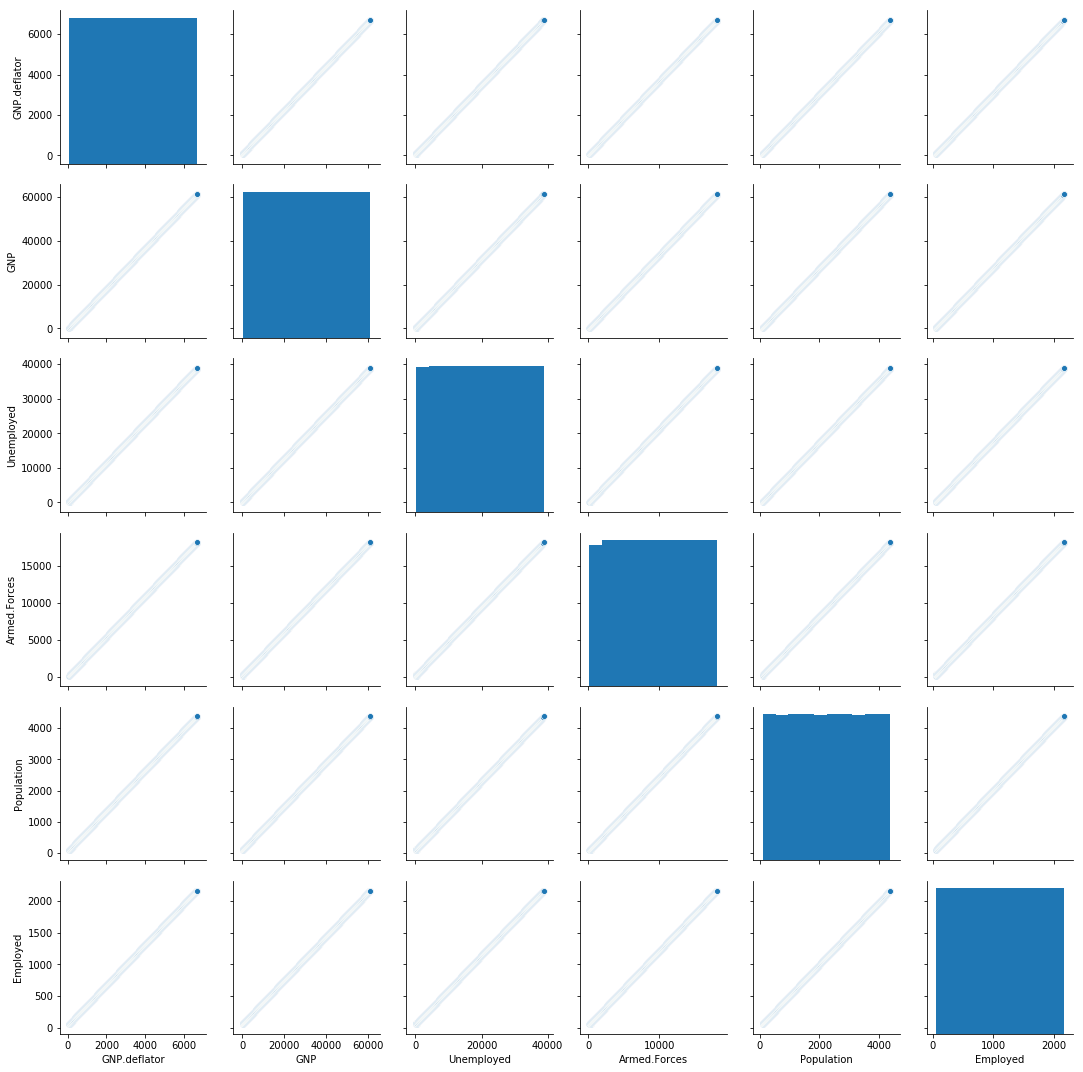

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(Employment)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


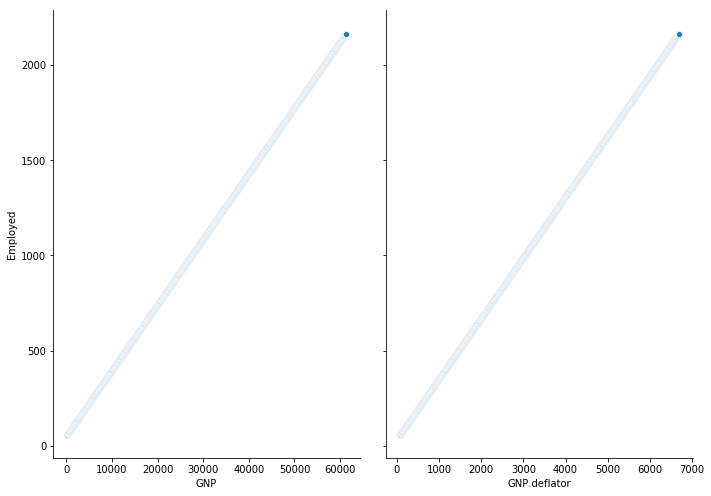

In [9]:
sns.pairplot(Employment,x_vars=['GNP','GNP.deflator'],y_vars='Employed',size=7,aspect=0.7,kind='scatter')

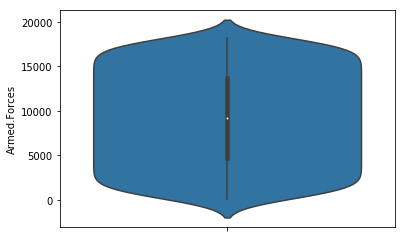

In [14]:
sns.violinplot(y='Armed.Forces',data=Employment)

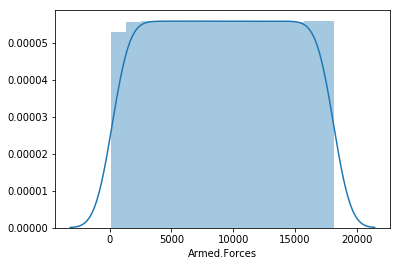

In [13]:
sns.distplot(Employment['Armed.Forces'])

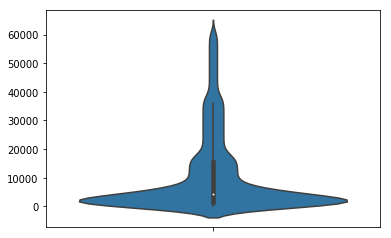

In [15]:
sns.violinplot(y=Employment)

In [18]:
y=Employment['Employed']
X=Employment.drop('Employed',axis=1) 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split (X,y,train_size = 0.7, random_state=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lm.intercept_

86.60529265365744

In [32]:
coff_df=pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficent'])
coff_df

,Coefficent
GNP.deflator,-0.117861
GNP,0.072006
Unemployed,-0.004394
Armed.Forces,-0.004965
Population,-0.293998


In [33]:
y_pred = lm.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt

In [37]:
mes=mean_squared_error(y_test,y_pred)

In [38]:
r_sqr = r2_score(y_test,y_pred)

In [40]:
rmse=sqrt(mes)

In [42]:
print('Mean_Squared_Error  :',mes)
print('Root_mean_Squared_Error  :',rmse)
print('r_square_value  :',r_sqr)

Mean_Squared_Error  : 0.0011771039565354495
Root_mean_Squared_Error  : 0.03430894863640461
r_square_value  : 0.9999999968372205


In [43]:
y_pred_train =lm.predict(X_train)

In [44]:
mes=mean_squared_error(y_train,y_pred_train)
r_sqr_train= r2_score(y_train,y_pred_train)
rmse= sqrt(mes)
print(mes,rmse,r_sqr)

0.0007581429791296379 0.02753439629135961 0.9999999968372205
